In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
datasets_loc=[
                '/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
                '/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
                '/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv',
                '/kaggle/input/network-intrusion-dataset/Monday-WorkingHours.pcap_ISCX.csv',
                '/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
                '/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
                '/kaggle/input/network-intrusion-dataset/Tuesday-WorkingHours.pcap_ISCX.csv',
                '/kaggle/input/network-intrusion-dataset/Wednesday-workingHours.pcap_ISCX.csv'  
             ]

In [3]:
# Load the dataset
datasets=[]
for loc in datasets_loc:
    datasets.append(pd.read_csv(loc))
data=pd.concat(datasets)
data


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
# 2. Encoding Categorical Variables
# Apply OneHotEncoding to categorical columns
encoder = OneHotEncoder(sparse_output=False)
encoder_data = pd.DataFrame(encoder.fit_transform(np.array(data[' Label']).reshape([-1,1])))
encoder_data_columns = encoder.get_feature_names_out([' Label'])
encoder_data.columns=encoder_data_columns

In [5]:
# Drop original categorical columns and add the new one-hot encoded columns
data = data.drop(columns=[' Label']).reset_index(drop=True)
data = pd.concat([data, encoder_data], axis=1)

In [6]:
data.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [7]:
# numerical_columns
n_unique=np.array(data.nunique())
data_col=data.columns
numerical_columns=[]
for i in range(len(data_col)):
    if n_unique[i] > 2:
        numerical_columns.append(data_col[i])
    else:
        print(data_col[i], n_unique[i])

Fwd PSH Flags 2
 Bwd PSH Flags 1
 Fwd URG Flags 2
 Bwd URG Flags 1
FIN Flag Count 2
 SYN Flag Count 2
 RST Flag Count 2
 PSH Flag Count 2
 ACK Flag Count 2
 URG Flag Count 2
 CWE Flag Count 2
 ECE Flag Count 2
Fwd Avg Bytes/Bulk 1
 Fwd Avg Packets/Bulk 1
 Fwd Avg Bulk Rate 1
 Bwd Avg Bytes/Bulk 1
 Bwd Avg Packets/Bulk 1
Bwd Avg Bulk Rate 1
 Label_BENIGN 2
 Label_Bot 2
 Label_DDoS 2
 Label_DoS GoldenEye 2
 Label_DoS Hulk 2
 Label_DoS Slowhttptest 2
 Label_DoS slowloris 2
 Label_FTP-Patator 2
 Label_Heartbleed 2
 Label_Infiltration 2
 Label_PortScan 2
 Label_SSH-Patator 2
 Label_Web Attack � Brute Force 2
 Label_Web Attack � Sql Injection 2
 Label_Web Attack � XSS 2


In [8]:
#droping NaN and Inf values
data=data.dropna()
data = data[~data.isin([np.inf, -np.inf]).any(axis=1)]
np.isinf(data[data.columns]).values.ravel().sum()

0

In [9]:
# 3. Normalization
# Apply MinMax Scaling
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [11]:
encoder_data_columns

array([' Label_BENIGN', ' Label_Bot', ' Label_DDoS',
       ' Label_DoS GoldenEye', ' Label_DoS Hulk',
       ' Label_DoS Slowhttptest', ' Label_DoS slowloris',
       ' Label_FTP-Patator', ' Label_Heartbleed', ' Label_Infiltration',
       ' Label_PortScan', ' Label_SSH-Patator',
       ' Label_Web Attack � Brute Force',
       ' Label_Web Attack � Sql Injection', ' Label_Web Attack � XSS'],
      dtype=object)

In [12]:
label_col=[
               ' Label_BENIGN', ' Label_Bot', ' Label_DDoS',
               ' Label_DoS GoldenEye', ' Label_DoS Hulk',
               ' Label_DoS Slowhttptest', ' Label_DoS slowloris',
               ' Label_FTP-Patator', ' Label_Heartbleed', ' Label_Infiltration',
               ' Label_PortScan', ' Label_SSH-Patator',
               ' Label_Web Attack � Brute Force',
               ' Label_Web Attack � Sql Injection', ' Label_Web Attack � XSS'
          ]

**To implement the feature extraction phase with deep autoencoders**




In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=label_col),data[label_col])

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np

In [20]:
# Hyperparameters
input_dim = len(data.columns)-len(label_col)  # Number of features
latent_dim = 32  # Dimension of latent space
learning_rate = 0.001
batch_size = 64
num_epochs = 20

In [21]:
# Define the Autoencoder Architecture
class Autoencoder(tf.keras.Model):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = models.Sequential([
            layers.InputLayer(shape=(input_dim,)),
            layers.Dense(64, activation='relu'),
            layers.Dense(48, activation='relu'),
            layers.Dense(latent_dim, activation='relu')  # Latent space
        ])
        
        # Decoder
        self.decoder = models.Sequential([
            layers.InputLayer(shape=(latent_dim,)),
            layers.Dense(48, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(input_dim, activation='sigmoid')  # Use sigmoid assuming data is normalized between [0, 1]
        ])
        
    def call(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed


In [22]:
# Instantiate the autoencoder
autoencoder = Autoencoder(input_dim=input_dim, latent_dim=latent_dim)
autoencoder.compile(optimizer='adam', loss='mse')

# Assuming 'X_train' is your preprocessed, normalized dataset for normal traffic
# Convert data to TensorFlow dataset
train_data = tf.data.Dataset.from_tensor_slices(X_train).batch(batch_size)

In [23]:
train_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 78), dtype=tf.float64, name=None)>

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="loss", patience=5)
history = autoencoder.fit(X_train, X_train, epochs=num_epochs, batch_size=batch_size, callbacks=[early_stopping])


Epoch 1/20
33140/33140 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - loss: 0.0031
Epoch 2/20
33140/33140 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 4.4199e-05
Epoch 3/20
33140/33140 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 3.1405e-05
Epoch 4/20
33140/33140 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 2.4608e-05
Epoch 5/20
33140/33140 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 2.2325e-05
Epoch 6/20
33140/33140 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 2.2878e-05
Epoch 7/20
33140/33140 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 1.9814e-05
Epoch 8/20
33140/33140 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 1.7554e-05
Epoch 9/20
33140/33140 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 1.8262e-05
Epoch 10/20
33140/33140 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 1.7367e-05
Epoch 11/20
33140/33140 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 1.7148e-05
Epoch 12/20
33140/33140 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 1.6991e-05
Epoch 13/20
33140/33140 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 1.6469e-05
Epoch 14/20


In [44]:
encoded_X_train = np.squeeze(encoded_X_train)  # This removes any extra singleton dimensions
encoded_X_train = np.expand_dims(encoded_X_train, axis=-1)  # Add only one extra dimension for CNN compatibility
inputs = layers.Input(shape=(32, 1))  # Adjust this to match your latent_dim
print("Encoded X_train shape:", encoded_X_train.shape)
print("y_train shape:", y_train.shape)


Encoded X_train shape: (2120907, 32, 1)
y_train shape: (2120907, 15)


In [50]:
from tensorflow.keras import layers, models

# Input Layer
inputs = layers.Input(shape=(32, 1))  # matches encoded_X_train

# CNN Path
cnn_path = layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
cnn_path = layers.MaxPooling1D(pool_size=2)(cnn_path)
cnn_path = layers.Flatten()(cnn_path)  # Flatten CNN path output

# LSTM Path
lstm_path = layers.LSTM(64, return_sequences=True)(inputs)
lstm_path = layers.Flatten()(lstm_path)  # Flatten LSTM path output

# Combine CNN and LSTM paths
combined = layers.concatenate([cnn_path, lstm_path])

# Attention Mechanism
attention = layers.Dense(1, activation='tanh')(combined)
attention_weights = layers.Activation('softmax')(attention)
attention_output = layers.multiply([combined, attention_weights])  # Apply attention weights

# Fully connected layer and output
x = layers.Dense(32, activation='relu')(attention_output)
output = layers.Dense(15, activation='softmax')(x)  # 15 output classes for multi-class classification

# Model compilation
attention_cnn_lstm_model = models.Model(inputs=inputs, outputs=output)
attention_cnn_lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [51]:
# Train the model
history = attention_cnn_lstm_model.fit(encoded_X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


26512/26512 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9591 - loss: 0.1235

/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


26512/26512 ━━━━━━━━━━━━━━━━━━━━ 174s 6ms/step - accuracy: 0.9591 - loss: 0.1235 - val_accuracy: 0.9770 - val_loss: 0.0590
Epoch 2/20
26512/26512 ━━━━━━━━━━━━━━━━━━━━ 171s 6ms/step - accuracy: 0.9773 - loss: 0.0558 - val_accuracy: 0.9790 - val_loss: 0.0483
Epoch 3/20
26512/26512 ━━━━━━━━━━━━━━━━━━━━ 171s 6ms/step - accuracy: 0.9801 - loss: 0.0489 - val_accuracy: 0.9801 - val_loss: 0.0489
Epoch 4/20
26512/26512 ━━━━━━━━━━━━━━━━━━━━ 171s 6ms/step - accuracy: 0.9815 - loss: 0.0454 - val_accuracy: 0.9825 - val_loss: 0.0439
Epoch 5/20
26512/26512 ━━━━━━━━━━━━━━━━━━━━ 171s 6ms/step - accuracy: 0.9821 - loss: 0.0432 - val_accuracy: 0.9832 - val_loss: 0.0413
Epoch 6/20
26512/26512 ━━━━━━━━━━━━━━━━━━━━ 172s 6ms/step - accuracy: 0.9830 - loss: 0.0411 - val_accuracy: 0.9826 - val_loss: 0.0485
Epoch 7/20
26512/26512 ━━━━━━━━━━━━━━━━━━━━ 172s 6ms/step - accuracy: 0.9845 - loss: 0.0386 - val_accuracy: 0.9856 - val_loss: 0.0380
Epoch 8/20
26512/26512 ━━━━━━━━━━━━━━━━━━━━ 172s 6ms/step - accuracy: 0.9

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



26512/26512 ━━━━━━━━━━━━━━━━━━━━ 172s 6ms/step - accuracy: 0.9856 - loss: 0.0360 - val_accuracy: 0.9853 - val_loss: 0.0366
Epoch 11/20
26512/26512 ━━━━━━━━━━━━━━━━━━━━ 172s 6ms/step - accuracy: 0.9857 - loss: 0.0354 - val_accuracy: 0.9862 - val_loss: 0.0365
Epoch 12/20
26512/26512 ━━━━━━━━━━━━━━━━━━━━ 171s 6ms/step - accuracy: 0.9858 - loss: 0.0351 - val_accuracy: 0.9865 - val_loss: 0.0363
Epoch 13/20
26512/26512 ━━━━━━━━━━━━━━━━━━━━ 172s 6ms/step - accuracy: 0.9861 - loss: 0.0346 - val_accuracy: 0.9860 - val_loss: 0.0360
Epoch 14/20
26512/26512 ━━━━━━━━━━━━━━━━━━━━ 172s 6ms/step - accuracy: 0.9861 - loss: 0.0343 - val_accuracy: 0.9864 - val_loss: 0.0344
Epoch 15/20
26512/26512 ━━━━━━━━━━━━━━━━━━━━ 172s 6ms/step - accuracy: 0.9863 - loss: 0.0339 - val_accuracy: 0.9867 - val_loss: 0.0341
Epoch 16/20
26512/26512 ━━━━━━━━━━━━━━━━━━━━ 172s 6ms/step - accuracy: 0.9863 - loss: 0.0337 - val_accuracy: 0.9874 - val_loss: 0.0333
Epoch 17/20
26512/26512 ━━━━━━━━━━━━━━━━━━━━ 172s 6ms/step - accura

In [53]:
# Save the Autoencoder model
autoencoder.save("autoencoder_model.h5")

# Save the final Attention CNN-LSTM model
attention_cnn_lstm_model.save("attention_cnn_lstm_model.h5")


In [54]:
print(f"Encoded X_test shape: {encoded_X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Encoded X_test shape: (706969, 32)
y_test shape: (706969, 15)


In [55]:
encoded_X_test = encoded_X_test.reshape(-1, 32, 1)

In [56]:
test_loss, test_accuracy = attention_cnn_lstm_model.evaluate(encoded_X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

22093/22093 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - accuracy: 0.9831 - loss: 0.0445
Test Loss: 0.0445, Test Accuracy: 0.9831


In [57]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. Evaluate model accuracy on the test set
test_loss, test_accuracy = attention_cnn_lstm_model.evaluate(encoded_X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# 2. Get model predictions
predictions = attention_cnn_lstm_model.predict(encoded_X_test)

# Convert predictions and true labels from one-hot encoded format to label indices
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

22093/22093 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - accuracy: 0.9831 - loss: 0.0445
Test Loss: 0.0445, Test Accuracy: 0.9831
   53/22093 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step     

/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


22093/22093 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


In [58]:
# 3. Classification Report: Precision, Recall, F1-Score for each class
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=label_col))


Classification Report:


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                   precision    recall  f1-score   support

                     Label_BENIGN       0.99      0.99      0.99    568011
                        Label_Bot       0.77      0.41      0.53       469
                       Label_DDoS       0.99      1.00      0.99     32164
              Label_DoS GoldenEye       0.99      0.97      0.98      2580
                   Label_DoS Hulk       0.98      0.95      0.97     57271
           Label_DoS Slowhttptest       0.97      0.97      0.97      1399
              Label_DoS slowloris       0.96      0.99      0.98      1485
                Label_FTP-Patator       1.00      0.87      0.93      1938
                 Label_Heartbleed       1.00      1.00      1.00         2
               Label_Infiltration       0.10      0.50      0.17         8
                   Label_PortScan       0.90      0.95      0.92     39617
                Label_SSH-Patator       0.94      0.89      0.92      1486
   Label_Web Attack � Br

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


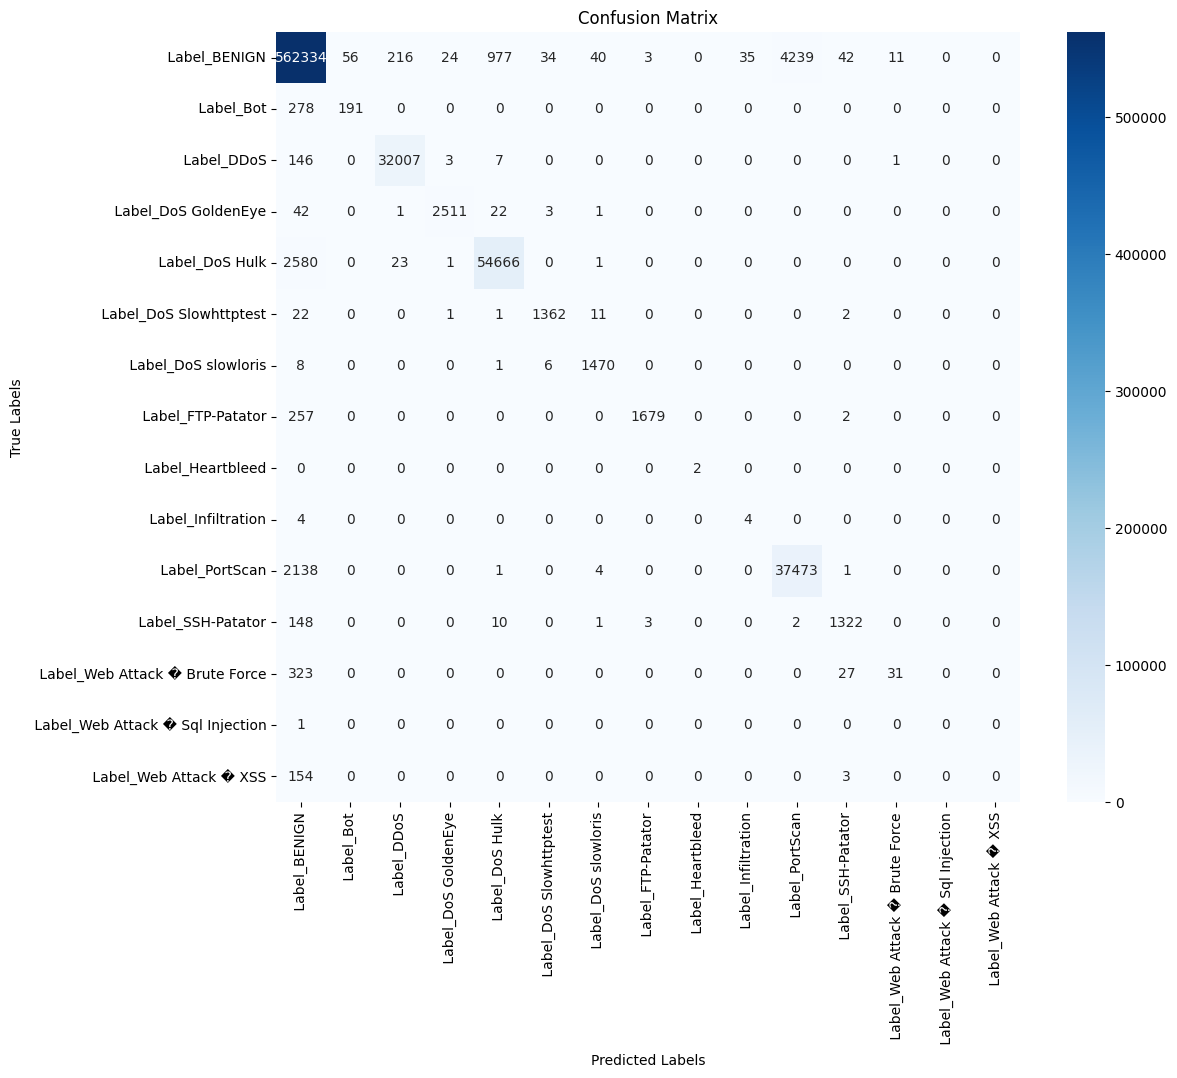

In [60]:
# Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_col, yticklabels=label_col)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()